In [1]:
TTS_PATH = "/mnt/FastData/dl_workspace/ws_other/voxbox/workspace/TTS"

In [2]:
import os
import sys
sys.path.append(TTS_PATH) # set this if TTS is not installed globally
import librosa
import numpy as np
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool
from matplotlib import pylab as plt
from collections import Counter
from TTS.tts.datasets.formatters import *
%matplotlib inline

In [3]:
DATA_PATH = "/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/"
META_DATA = "/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/transcripts/ds_v2/metadata_train.txt"
NUM_PROC = 8

In [4]:
# use your own preprocessor at this stage - TTS/datasets/proprocess.py
items = voxbox(DATA_PATH, META_DATA)
print(" > Number of audio files: {}".format(len(items)))

 > Number of audio files: 26205


In [5]:
# check wavs if exist
wav_files = []
for item in items:
    wav_file = item[1].strip()
    wav_files.append(wav_file)
    if not os.path.exists(wav_file):
        print(waf_path)

In [6]:
# show duplicate items
c = Counter(wav_files)
print([item for item, count in c.items() if count > 1])

[]


In [7]:
def load_item(item):
    file_name = item[1].strip()
    text = item[0].strip()
    audio = librosa.load(file_name, sr=None)
    sr = audio[1]
    audio = audio[0]
    audio_len = len(audio) / sr
    text_len = len(text)
    return file_name, text, text_len, audio, audio_len

# This will take a while depending on size of dataset
if NUM_PROC == 1:
    data = []
    for m in tqdm(items):
        data += [load_item(m)]
else:
    with Pool(8) as p:
        data = list(tqdm(p.imap(load_item, items), total=len(items)))

100%|██████████| 26205/26205 [00:12<00:00, 2055.98it/s]


In [8]:
# count words in the dataset
w_count = Counter()
for item in tqdm(data):
    text = item[1].lower().strip()
    for word in text.split():
        w_count[word] += 1
print(" > Number of words: {}".format(len(w_count)))

100%|██████████| 26205/26205 [00:00<00:00, 168445.81it/s]

 > Number of words: 17181


In [9]:
text_vs_durs = {}  # text length vs audio duration
text_len_counter = Counter()  # number of sentences with the keyed length
for item in tqdm(data):
    text = item[1].lower().strip()
    text_len = len(text)
    text_len_counter[text_len] += 1
    audio_len = item[-1]
    try:
        text_vs_durs[text_len] += [audio_len]
    except:
        text_vs_durs[text_len] = [audio_len]

100%|██████████| 26205/26205 [00:00<00:00, 592369.20it/s]


In [10]:
# text_len vs avg_audio_len, median_audio_len, std_audio_len
text_vs_avg = {}
text_vs_median = {}
text_vs_std = {}
for key, durs in text_vs_durs.items():
    text_vs_avg[key] = np.mean(durs)
    text_vs_median[key] = np.median(durs)
    text_vs_std[key] = np.std(durs)

### Avg audio length per char

In [11]:
for item in data:
    if item[-1] < 2:
        print(item)

('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/mara_41_00010_3.wav', 'Fratele ei.', 11, array([0.00137329, 0.0010376 , 0.00073242, ..., 0.00115967, 0.00097656,
       0.00189209], dtype=float32), 1.294875)
('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/eme_rnd2_496.wav', 'Fiecare clasă are dulăpioare pentru elevi, calculatoare și televizoare.', 71, array([-0.04193115, -0.07437134, -0.05963135, ..., -0.22061157,
       -0.18991089,  0.        ], dtype=float32), 0.68575)
('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/eme_rnd1_338.wav', 'Era o fată bună.', 16, array([ 0.00085449,  0.00152588,  0.00158691, ..., -0.00485229,
       -0.00466919,  0.        ], dtype=float32), 1.8389375)
('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/eme_rnd2_383.wav', 'Am avut un club.', 16, array([-0.0166626 , -0.0296936 , -0.02661133, ...,  0.00369263,
        0.00216675,  0.        ], dtype=float

('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/ips_rnd2_014.wav', 'Aș vrea să se califice amândouă.', 32, array([0.00021362, 0.00042725, 0.00119019, ..., 0.00436401, 0.00219727,
       0.        ], dtype=float32), 1.7074375)
('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/ips_rnd2_040.wav', 'România aceea e la sat.', 23, array([ 0.0007019 ,  0.00106812,  0.00076294, ..., -0.00061035,
       -0.00054932,  0.        ], dtype=float32), 1.5130625)
('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/ips_rnd2_329.wav', 'Niciodată nu-mi plăcea să pierd.', 32, array([6.1035156e-04, 9.1552734e-04, 9.4604492e-04, ..., 9.1552734e-05,
       2.1362305e-04, 0.0000000e+00], dtype=float32), 1.7028125)
('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/ips_rnd2_186.wav', 'Din două mii doisprezece.', 25, array([-0.00036621, -0.00106812, -0.00054932, ...,  0.00048828,
        0.00033569,  0.        ], d

In [13]:
sec_per_chars = []
for item in data:
    text = item[1]
    dur = item[-1]
    sec_per_char = dur / len(text)
    sec_per_chars.append(sec_per_char)
# sec_per_char /= len(data)
# print(sec_per_char)

In [14]:
mean = np.mean(sec_per_chars)
std = np.std(sec_per_chars)
print(mean)
print(std)

0.06844157192973443
0.014213846716050514


In [15]:
dist = norm(mean, std)

# find irregular instances long or short voice durations
for item in data:
    text = item[1]
    dur = item[-1]
    sec_per_char = dur / len(text)
    pdf =norm.pdf(sec_per_char)
    if pdf < 0.39:
        print(item)

('/mnt/FastData/dl_workspace/ws_other/voxbox/datasets/resampled/ds_v2/wavs/adr_ivan_110.wav', 'Eu.', 3, array([-0.00088501, -0.00134277, -0.00115967, ...,  0.0027771 ,
        0.00265503,  0.        ], dtype=float32), 0.6478125)


### Plot Dataset Statistics

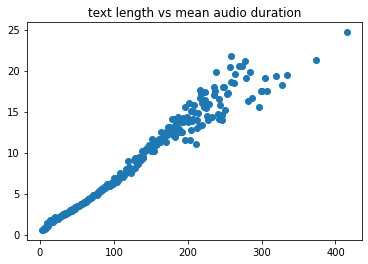

In [16]:
plt.title("text length vs mean audio duration")
plt.scatter(list(text_vs_avg.keys()), list(text_vs_avg.values()))

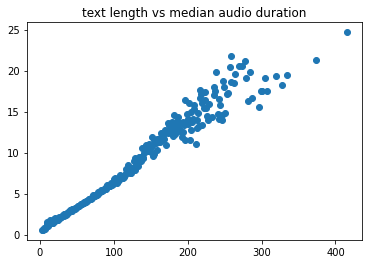

In [17]:
plt.title("text length vs median audio duration")
plt.scatter(list(text_vs_median.keys()), list(text_vs_median.values()))

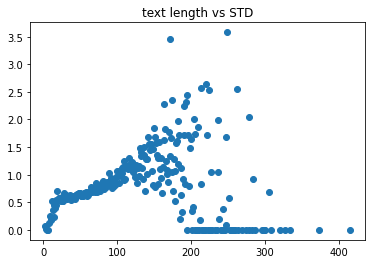

In [18]:
plt.title("text length vs STD")
plt.scatter(list(text_vs_std.keys()), list(text_vs_std.values()))

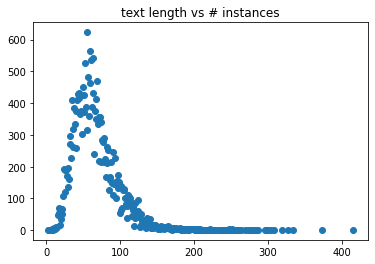

In [19]:
plt.title("text length vs # instances")
plt.scatter(list(text_len_counter.keys()), list(text_len_counter.values()))

### Check words frequencies

In [20]:
w_count_df = pd.DataFrame.from_dict(w_count, orient='index')
w_count_df.sort_values(0, ascending=False, inplace=True)

In [21]:
w_count_df

,0
de,12412
și,8446
în,7127
a,5721
la,5492
...,...
roage,1
monotone.,1
tocăniturile,1
auzeau,1


In [22]:
# check a certain word
w_count_df.at['minute', 0]

68

<AxesSubplot:>

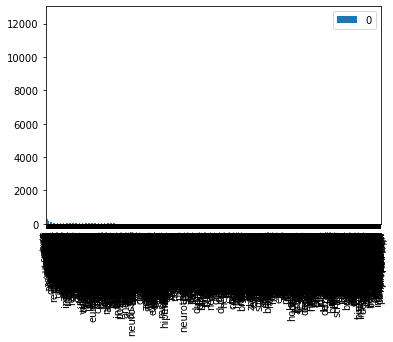

In [23]:
# fequency bar plot - it takes time!!
w_count_df.plot.bar()